<a href="https://colab.research.google.com/github/DMXMax/covid19/blob/gc_20200315/coviddata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests,json
import datetime


In [0]:
covidtrackingurl = "https://covidtracking.com/api/v1/states/daily.json"
response = requests.get(covidtrackingurl)
dfCovidtracking = pd.DataFrame(response.json())
dfCovidtracking.fillna(0, inplace=True)
dfCovidtracking.negative = dfCovidtracking.negative.astype('int64')
dfCovidtracking.positive = dfCovidtracking.positive.astype('int64')
dfCovidtracking.pending = dfCovidtracking.pending.astype('int64')
dfCovidtracking.total = dfCovidtracking.total.astype('int64')
dfCovidtracking.death = dfCovidtracking.death.astype('int64')

dfCovidtracking.date = dfCovidtracking.date.transform(lambda x: pd.to_datetime(datetime.date(x//10000, x%10000//100, x%100
                                          )))
dfCovidtracking.set_index(['date'], inplace=True)


In [0]:
dfWHO = pd.read_csv("https://raw.githubusercontent.com/DMXMax/covid19/master/who/who_data.tsv",
                     sep='\t', index_col='Date')

In [0]:
jhurl = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/"+\
"csse_covid_19_data/csse_covid_19_daily_reports/05-28-2020.csv"


dfJHUData = pd.read_csv(jhurl, header=0,
                        names=['FIPS', 'city','state', 'country', 'last_update',
                               'lat', 'lon','confirmed', 'dead', 'recovered','active', 'key'])

In [0]:
dfWHO = dfWHO.rename(columns={"Confirmed": "confirmed", "Deaths": "who_deaths"})
dfWHO.index.names=['date']


In [6]:
print("US Summary")
dfCovidtracking.groupby(by='date').sum()[-3:][['positive', 'death', 'positiveIncrease', 'deathIncrease']]

US Summary


,positive,death,positiveIncrease,deathIncrease
date,,,,
2020-05-27,1689630,94352,18595.0,1259.0
2020-05-28,1712637,95705,23007.0,1353.0
2020-05-29,1736571,96891,23934.0,1186.0


In [7]:
dfCovidtracking.loc[dfCovidtracking.state=='CA'].groupby(by='date').sum()[-3:][['positive', 'death', 'positiveIncrease', 'deathIncrease']].head(5)

,positive,death,positiveIncrease,deathIncrease
date,,,,
2020-05-27,98980,3884,2247.0,70.0
2020-05-28,101697,3973,2717.0,89.0
2020-05-29,103886,4068,2189.0,95.0


In [8]:
dfctd_state_curr = dfCovidtracking.loc[dfCovidtracking.index.max()] \
  .rename(columns={'positive':'total_positive'}) \
  .set_index('state') 

print(f"Total positive cases = {dfctd_state_curr.total_positive.sum()}")
print(f"Total deaths = {dfctd_state_curr.death.sum()}")
  
dfctd_state_curr.sort_values(by='total_positive', ascending=False).head(5)

Total positive cases = 1736571
Total deaths = 96891


,total_positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,onVentilatorCumulative,recovered,dataQualityGrade,lastUpdateEt,hash,dateChecked,death,hospitalized,total,totalTestResults,posNeg,fips,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease
state,,,,,,,,,,,,,,,,,,,,,,,,,
NY,368284,1575846,0,3781.0,89194.0,1164.0,0.0,889.0,0.0,65289.0,A,5/29/2020 00:00,15f070f58330eac7d76fd905ff2d1fe26af84243,2020-05-29T20:00:00Z,23780,89194.0,1944130,1944130,1944130,36,58.0,152.0,65790.0,1551.0,67341.0
NJ,158844,557567,0,2707.0,16960.0,720.0,0.0,544.0,0.0,26084.0,A+,5/29/2020 13:00,d7c4c6a16b9a73760653316c26419cc151a8e00e,2020-05-29T20:00:00Z,11531,16960.0,716411,716411,716411,34,130.0,182.0,29525.0,1029.0,30554.0
IL,117455,734307,0,3599.0,0.0,980.0,0.0,593.0,0.0,0.0,A,5/29/2020 00:59,bcabf626a8364ed9c91e4513e7633b3897539d75,2020-05-29T20:00:00Z,5270,0.0,851762,851762,851762,17,84.0,0.0,20174.0,1622.0,21796.0
CA,103886,1731592,0,4414.0,0.0,1328.0,0.0,0.0,0.0,0.0,B,5/29/2020 00:00,3b253b827dc2454109254b7bd14e9613d159015e,2020-05-29T20:00:00Z,4068,0.0,1835478,1835478,1835478,06,95.0,0.0,42730.0,2189.0,44919.0
MA,95512,476233,0,1991.0,9725.0,485.0,0.0,0.0,0.0,0.0,A,5/29/2020 16:00,21b6e7c5274537396b6d015d35d2d040eba08b52,2020-05-29T20:00:00Z,6718,9725.0,571745,571745,571745,25,78.0,107.0,8805.0,617.0,9422.0


In [0]:
curr_state = 'CA'
gbUSA = dfCovidtracking.groupby(['date'])
gbState = dfCovidtracking[dfCovidtracking.state==curr_state].groupby(['date'])

cols = ['positive', 'totalTestResults', 'death', 'positiveIncrease','deathIncrease']

dfUSAPos = gbUSA[cols].sum().reset_index().copy()
dfStatePos = gbState[cols].sum().reset_index().copy()

#This will calculate the percentage each day is of the total. In a flattening, this will be more even
# In a high growth situation, you'll higher percentages at the tail. 

dfUSAPos['pos_pct']= dfUSAPos.positive/dfctd_state_curr.total_positive.sum()
dfStatePos['pos_pct']=dfStatePos.positive/dfctd_state_curr.loc[curr_state].total_positive

In [10]:
dfUSAPos[-7:]


,date,positive,totalTestResults,death,positiveIncrease,deathIncrease,pos_pct
122,2020-05-23,1614954,13784786,91287,22298.0,1091.0,0.929967
123,2020-05-24,1635760,14163694,91941,20806.0,654.0,0.941948
124,2020-05-25,1654829,14604942,92464,19069.0,523.0,0.952929
125,2020-05-26,1671035,14907041,93093,16206.0,629.0,0.962261
126,2020-05-27,1689630,15192481,94352,18595.0,1259.0,0.972969
127,2020-05-28,1712637,15607239,95705,23007.0,1353.0,0.986218
128,2020-05-29,1736571,16099515,96891,23934.0,1186.0,1.000000


In [11]:
dfStatePos[-7:]

,date,positive,totalTestResults,death,positiveIncrease,deathIncrease,pos_pct
80,2020-05-23,90631,1515306,3708,2187.0,78.0,0.872408
81,2020-05-24,92710,1582745,3774,2079.0,66.0,0.892421
82,2020-05-25,94558,1644102,3795,1848.0,21.0,0.910209
83,2020-05-26,96733,1696396,3814,2175.0,19.0,0.931146
84,2020-05-27,98980,1736894,3884,2247.0,70.0,0.952775
85,2020-05-28,101697,1790559,3973,2717.0,89.0,0.978929
86,2020-05-29,103886,1835478,4068,2189.0,95.0,1.000000


In [12]:
gbUSA.sum()[-5:]

,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,onVentilatorCumulative,recovered,death,hospitalized,total,totalTestResults,posNeg,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease
date,,,,,,,,,,,,,,,,,,,,
2020-05-25,1654829,12950113,3368,36668.0,184570.0,8472.0,7847.0,4237.0,642.0,379157.0,92464,184570.0,14608310,14604942,14604942,523.0,967.0,422179.0,19069.0,441248.0
2020-05-26,1671035,13236006,1549,36609.0,201872.0,8585.0,7899.0,4215.0,650.0,384902.0,93093,201872.0,14908590,14907041,14907041,629.0,17302.0,285893.0,16206.0,302099.0
2020-05-27,1689630,13502851,3132,37253.0,203474.0,8551.0,8015.0,4222.0,666.0,391508.0,94352,203474.0,15195613,15192481,15192481,1259.0,1602.0,266845.0,18595.0,285440.0
2020-05-28,1712637,13894602,1906,36967.0,205974.0,8389.0,8109.0,4080.0,676.0,399991.0,95705,205974.0,15609145,15607239,15607239,1353.0,2500.0,391751.0,23007.0,414758.0
2020-05-29,1736571,14362944,2978,35871.0,207694.0,8175.0,8235.0,4032.0,689.0,406446.0,96891,207694.0,16102493,16099515,16099515,1186.0,1720.0,468342.0,23934.0,492276.0


In [13]:
gbState.sum()[-5:]

,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,onVentilatorCumulative,recovered,death,hospitalized,total,totalTestResults,posNeg,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease
date,,,,,,,,,,,,,,,,,,,,
2020-05-25,94558,1549544,0,4306.0,0.0,1301.0,0.0,0.0,0.0,0.0,3795,0.0,1644102,1644102,1644102,21.0,0.0,59509.0,1848.0,61357.0
2020-05-26,96733,1599663,0,4404.0,0.0,1392.0,0.0,0.0,0.0,0.0,3814,0.0,1696396,1696396,1696396,19.0,0.0,50119.0,2175.0,52294.0
2020-05-27,98980,1637914,0,4544.0,0.0,1407.0,0.0,0.0,0.0,0.0,3884,0.0,1736894,1736894,1736894,70.0,0.0,38251.0,2247.0,40498.0
2020-05-28,101697,1688862,0,4529.0,0.0,1325.0,0.0,0.0,0.0,0.0,3973,0.0,1790559,1790559,1790559,89.0,0.0,50948.0,2717.0,53665.0
2020-05-29,103886,1731592,0,4414.0,0.0,1328.0,0.0,0.0,0.0,0.0,4068,0.0,1835478,1835478,1835478,95.0,0.0,42730.0,2189.0,44919.0


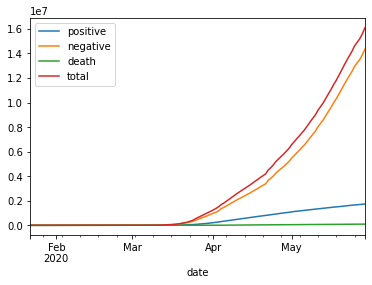

In [14]:
x=gbUSA.sum().loc[:, ['positive', 'negative','death','total']].plot.line()

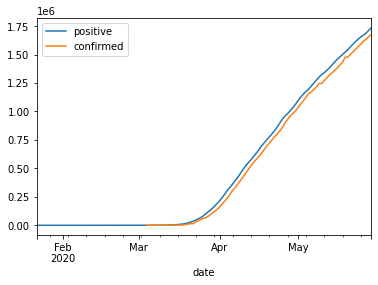

In [15]:
dfResults = gbUSA.sum().join(dfWHO, how='left', rsuffix='_who' )
dfResults.loc[:, ['positive', 'confirmed']].plot.line()

# John Hopkins Data


In [16]:
dfJHUData[dfJHUData.country=='US'][['confirmed', 'dead']].sum()

confirmed    1721753
dead          101616
dtype: int64

In [17]:
dfJHUData[(dfJHUData.country=='US')&(dfJHUData.state=='California')][['confirmed', 'dead']].sum()

confirmed    103813
dead           3993
dtype: int64

In [0]:
dfJHUUS = dfJHUData[dfJHUData.country=='US']
gbJHUByState= dfJHUUS.groupby(by='state')
gbJHUByCountry = dfJHUData.groupby(by='country')

In [19]:
gbJHUByCountry.confirmed.sum().sort_values(ascending=False).head(10)

country
US                1721753
Brazil             438238
Russia             379051
United Kingdom     270508
Spain              237906
Italy              231732
France             186364
Germany            182196
India              165386
Turkey             160979
Name: confirmed, dtype: int64

In [20]:
dfctd_state_curr.head()

,total_positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,onVentilatorCumulative,recovered,dataQualityGrade,lastUpdateEt,hash,dateChecked,death,hospitalized,total,totalTestResults,posNeg,fips,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease
state,,,,,,,,,,,,,,,,,,,,,,,,,
AK,430,49009,0,14.0,0.0,0.0,0.0,1.0,0.0,367.0,A,5/29/2020 00:00,3b98a363a01ed0eb232b766014d34d20598adf06,2020-05-29T20:00:00Z,10,0.0,49439,49439,49439,02,0.0,0.0,1464.0,5.0,1469.0
AL,16823,192060,0,0.0,1800.0,0.0,577.0,0.0,344.0,9355.0,B,5/29/2020 00:00,2e56b1bae02eeb9fb45a73f76ab353a9b95d286e,2020-05-29T20:00:00Z,605,1800.0,208883,208883,208883,01,15.0,35.0,7889.0,513.0,8402.0
AR,6538,113230,0,104.0,667.0,0.0,0.0,27.0,119.0,4583.0,A,5/28/2020 19:50,a38c2b18deb3d79808e87c050a128f6738792513,2020-05-29T20:00:00Z,125,667.0,119768,119768,119768,05,5.0,27.0,866.0,0.0,866.0
AS,0,174,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,C,5/29/2020 00:00,7a248a94fa36dd48a542e6c2102139dd50a90c7d,2020-05-29T20:00:00Z,0,0.0,174,174,174,60,0.0,0.0,0.0,0.0,0.0
AZ,18465,191348,0,931.0,2911.0,378.0,0.0,238.0,0.0,4551.0,A+,5/29/2020 00:00,49f3a5679793224575729d22fd7aa2068e6a24df,2020-05-29T20:00:00Z,885,2911.0,209813,209813,209813,04,28.0,63.0,6197.0,702.0,6899.0


In [0]:
dfState = dfCovidtracking.reset_index()[['date','state','positive', 'death']].set_index('state') \
  .join(dfctd_state_curr.total_positive)

In [0]:
dfState['pct']=dfState.positive/dfState.total_positive

In [23]:
dfState.loc['FL'].head(7)

,date,positive,death,total_positive,pct
state,,,,,
FL,2020-05-29,54497,2495,54497,1.000000
FL,2020-05-28,53285,2446,54497,0.977760
FL,2020-05-27,52634,2400,54497,0.965815
FL,2020-05-26,52255,2338,54497,0.958860
FL,2020-05-25,51746,2331,54497,0.949520
FL,2020-05-24,50867,2316,54497,0.933391
FL,2020-05-23,50127,2312,54497,0.919812


In [0]:
res = dfState.reset_index().pivot(index = 'date', columns='state', values='pct').fillna(0)

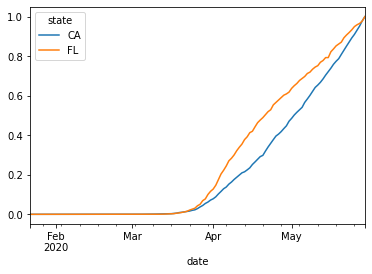

In [25]:
x = res.loc[:, ['CA','FL']].plot.line()

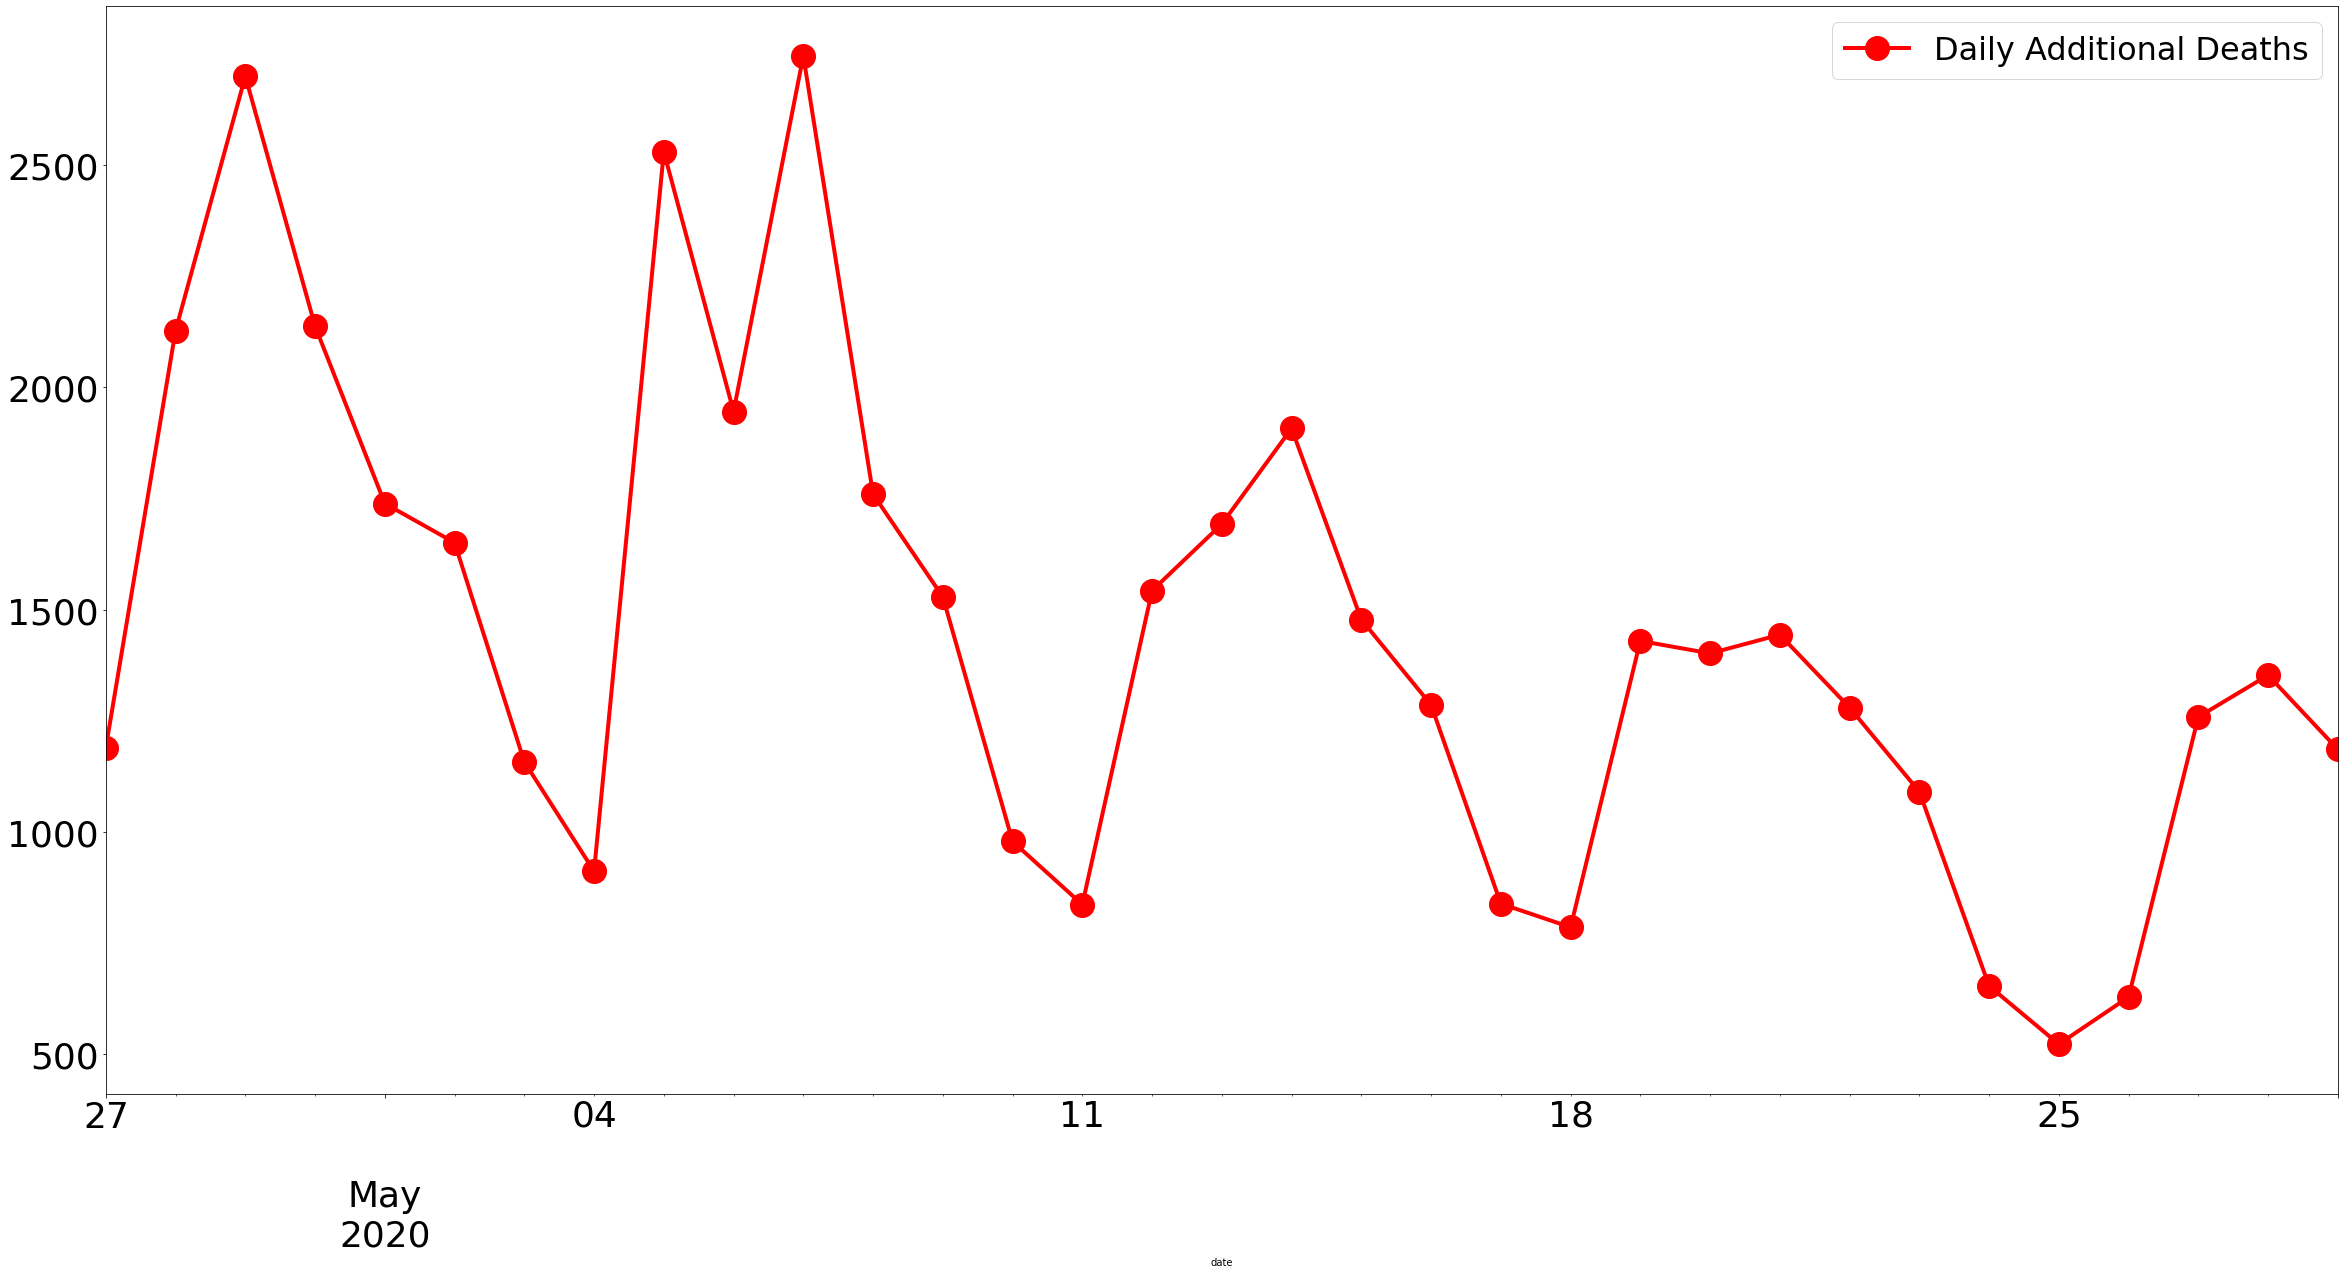

In [26]:
x = dfCovidtracking.groupby(by='date')
y1=x.sum()[-33:].deathIncrease.plot.line(figsize=(40,20), fontsize=36, \
  style='.-', markersize=48, color='red', linewidth=4) \
.legend(['Daily Additional Deaths'],fontsize=32)


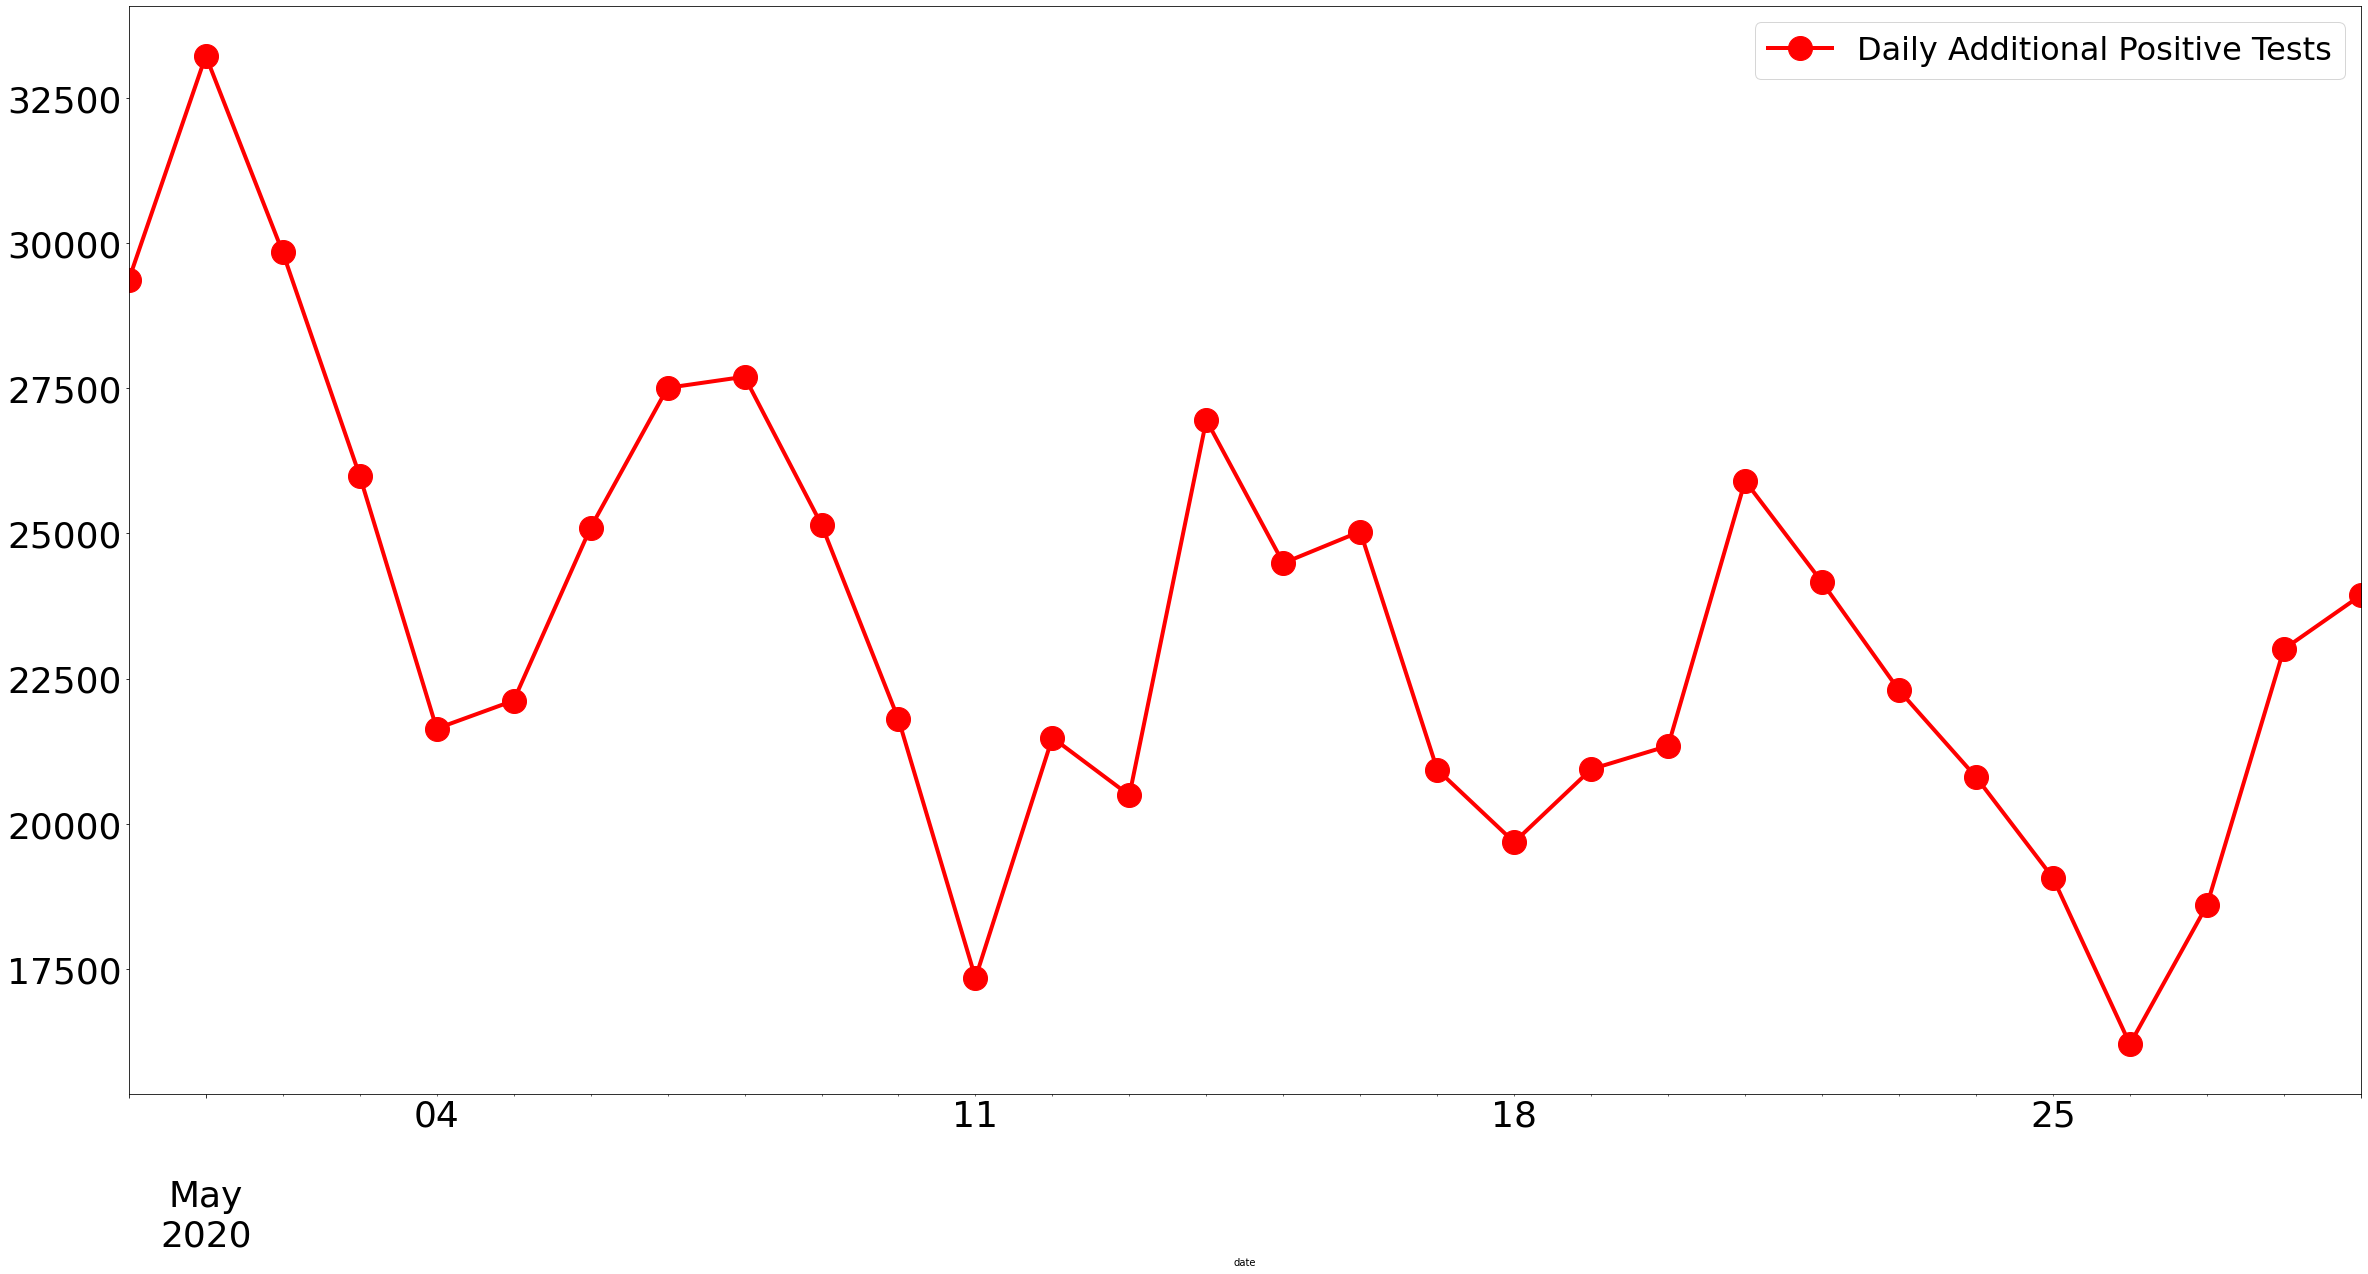

In [27]:
x = dfCovidtracking.groupby(by='date')
y1=x.sum()

chart = y1[-30:].positiveIncrease.plot.line(figsize=(40,20), fontsize=36, \
  style='.-', markersize=48, color='red', linewidth=4) \
.legend(['Daily Additional Positive Tests'],fontsize=32)


In [0]:
def getWeek(dt):
  return (dt.year*100)+dt.week

dfByWeekYear = dfCovidtracking[['deathIncrease', 'hospitalizedIncrease', 'negativeIncrease','positiveIncrease','totalTestResultsIncrease']].groupby(by=getWeek)


In [0]:
def getWeek(dt):
  return (dt.year*100)+dt.week

dfDoW = dfCovidtracking[['deathIncrease', 'hospitalizedIncrease', 'negativeIncrease','positiveIncrease','totalTestResultsIncrease']].groupby(by=lambda x: x.dayofweek)


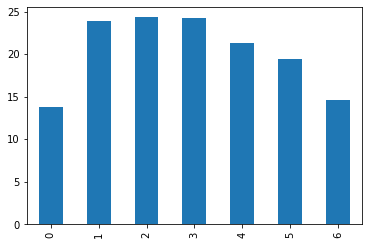

In [30]:
dfDoW.mean().deathIncrease.plot.bar()



In [31]:
dfByWeekYear.sum()[-7:]

,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease
202016,14063.0,24260.0,844332.0,199843.0,1044175.0
202017,12864.0,18512.0,1319356.0,209064.0,1528420.0
202018,12704.0,24872.0,1462961.0,191865.0,1654826.0
202019,12402.0,18998.0,1747407.0,171010.0,1909104.0
202020,9584.0,12129.0,2324282.0,156723.0,2481005.0
202021,8087.0,15648.0,2548088.0,155132.0,2703220.0
202022,4950.0,24091.0,1835010.0,100811.0,1935821.0


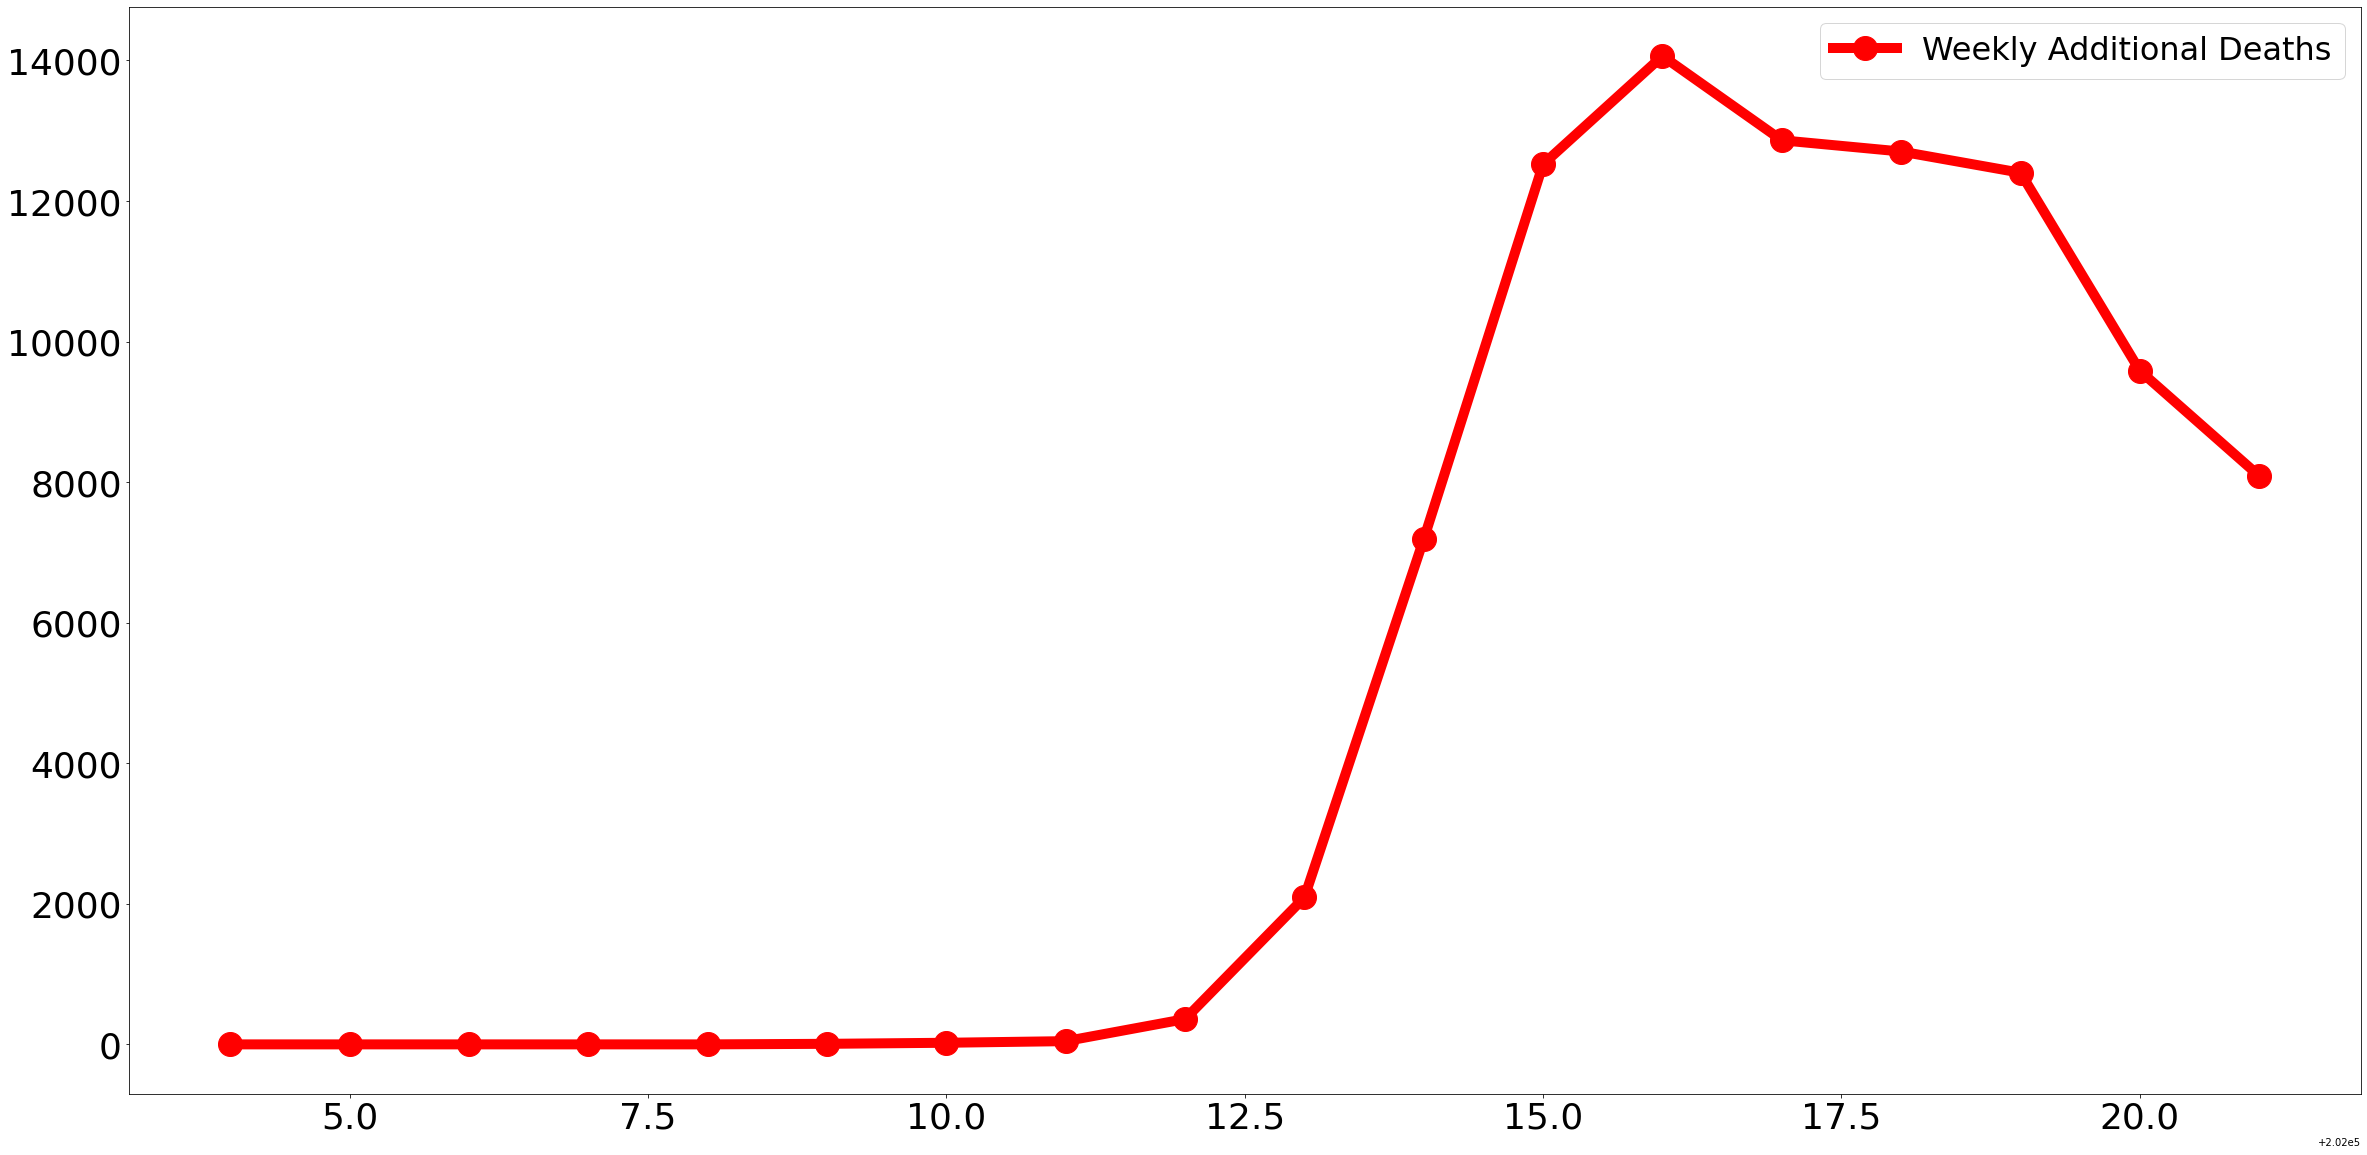

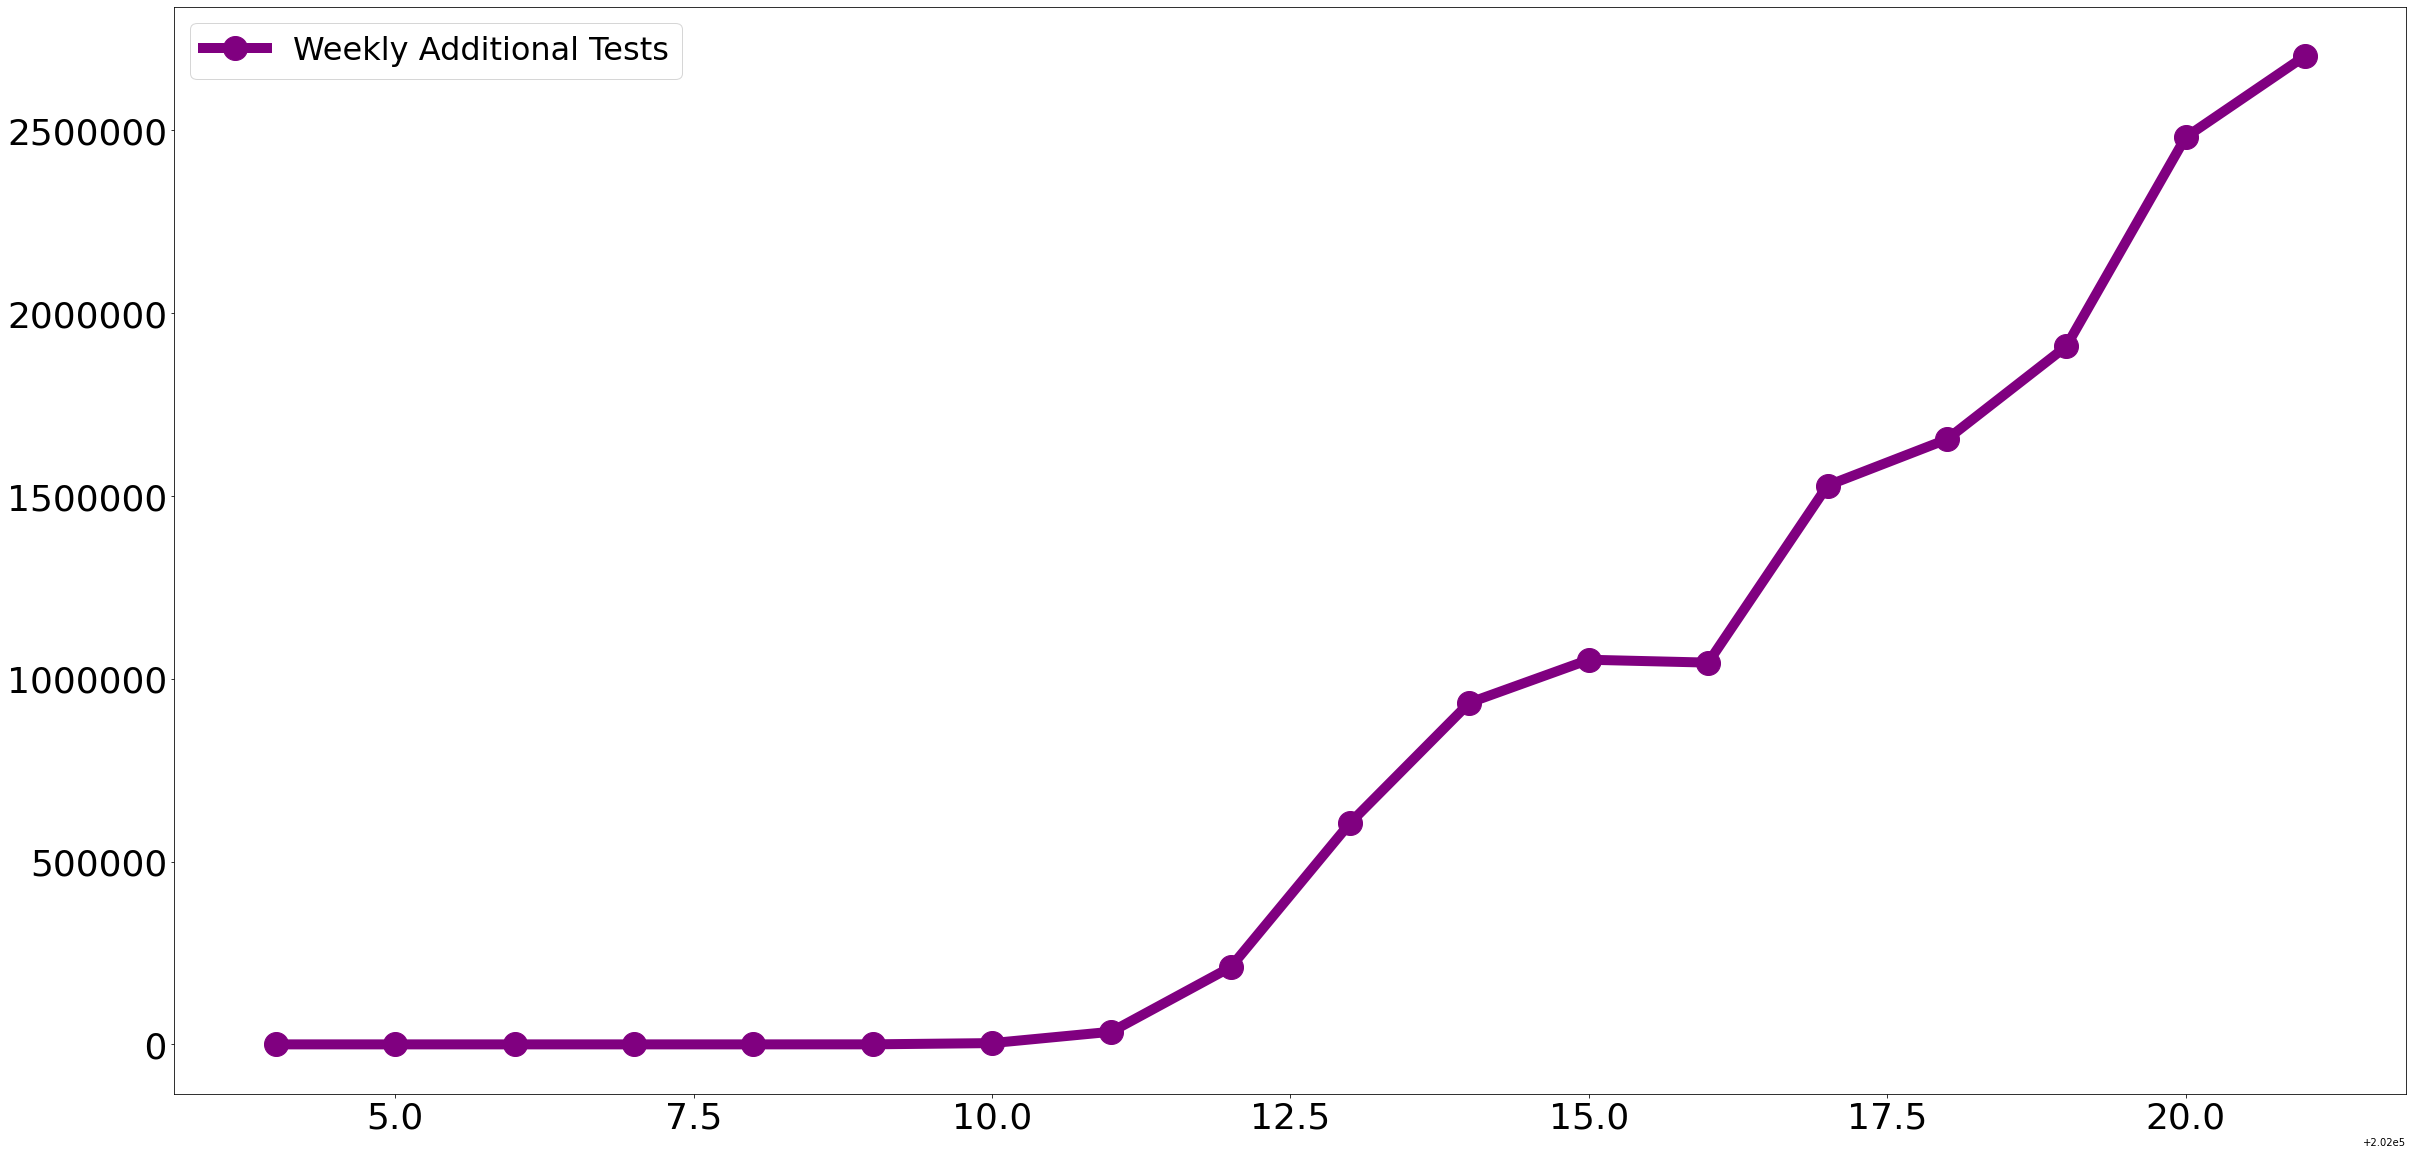

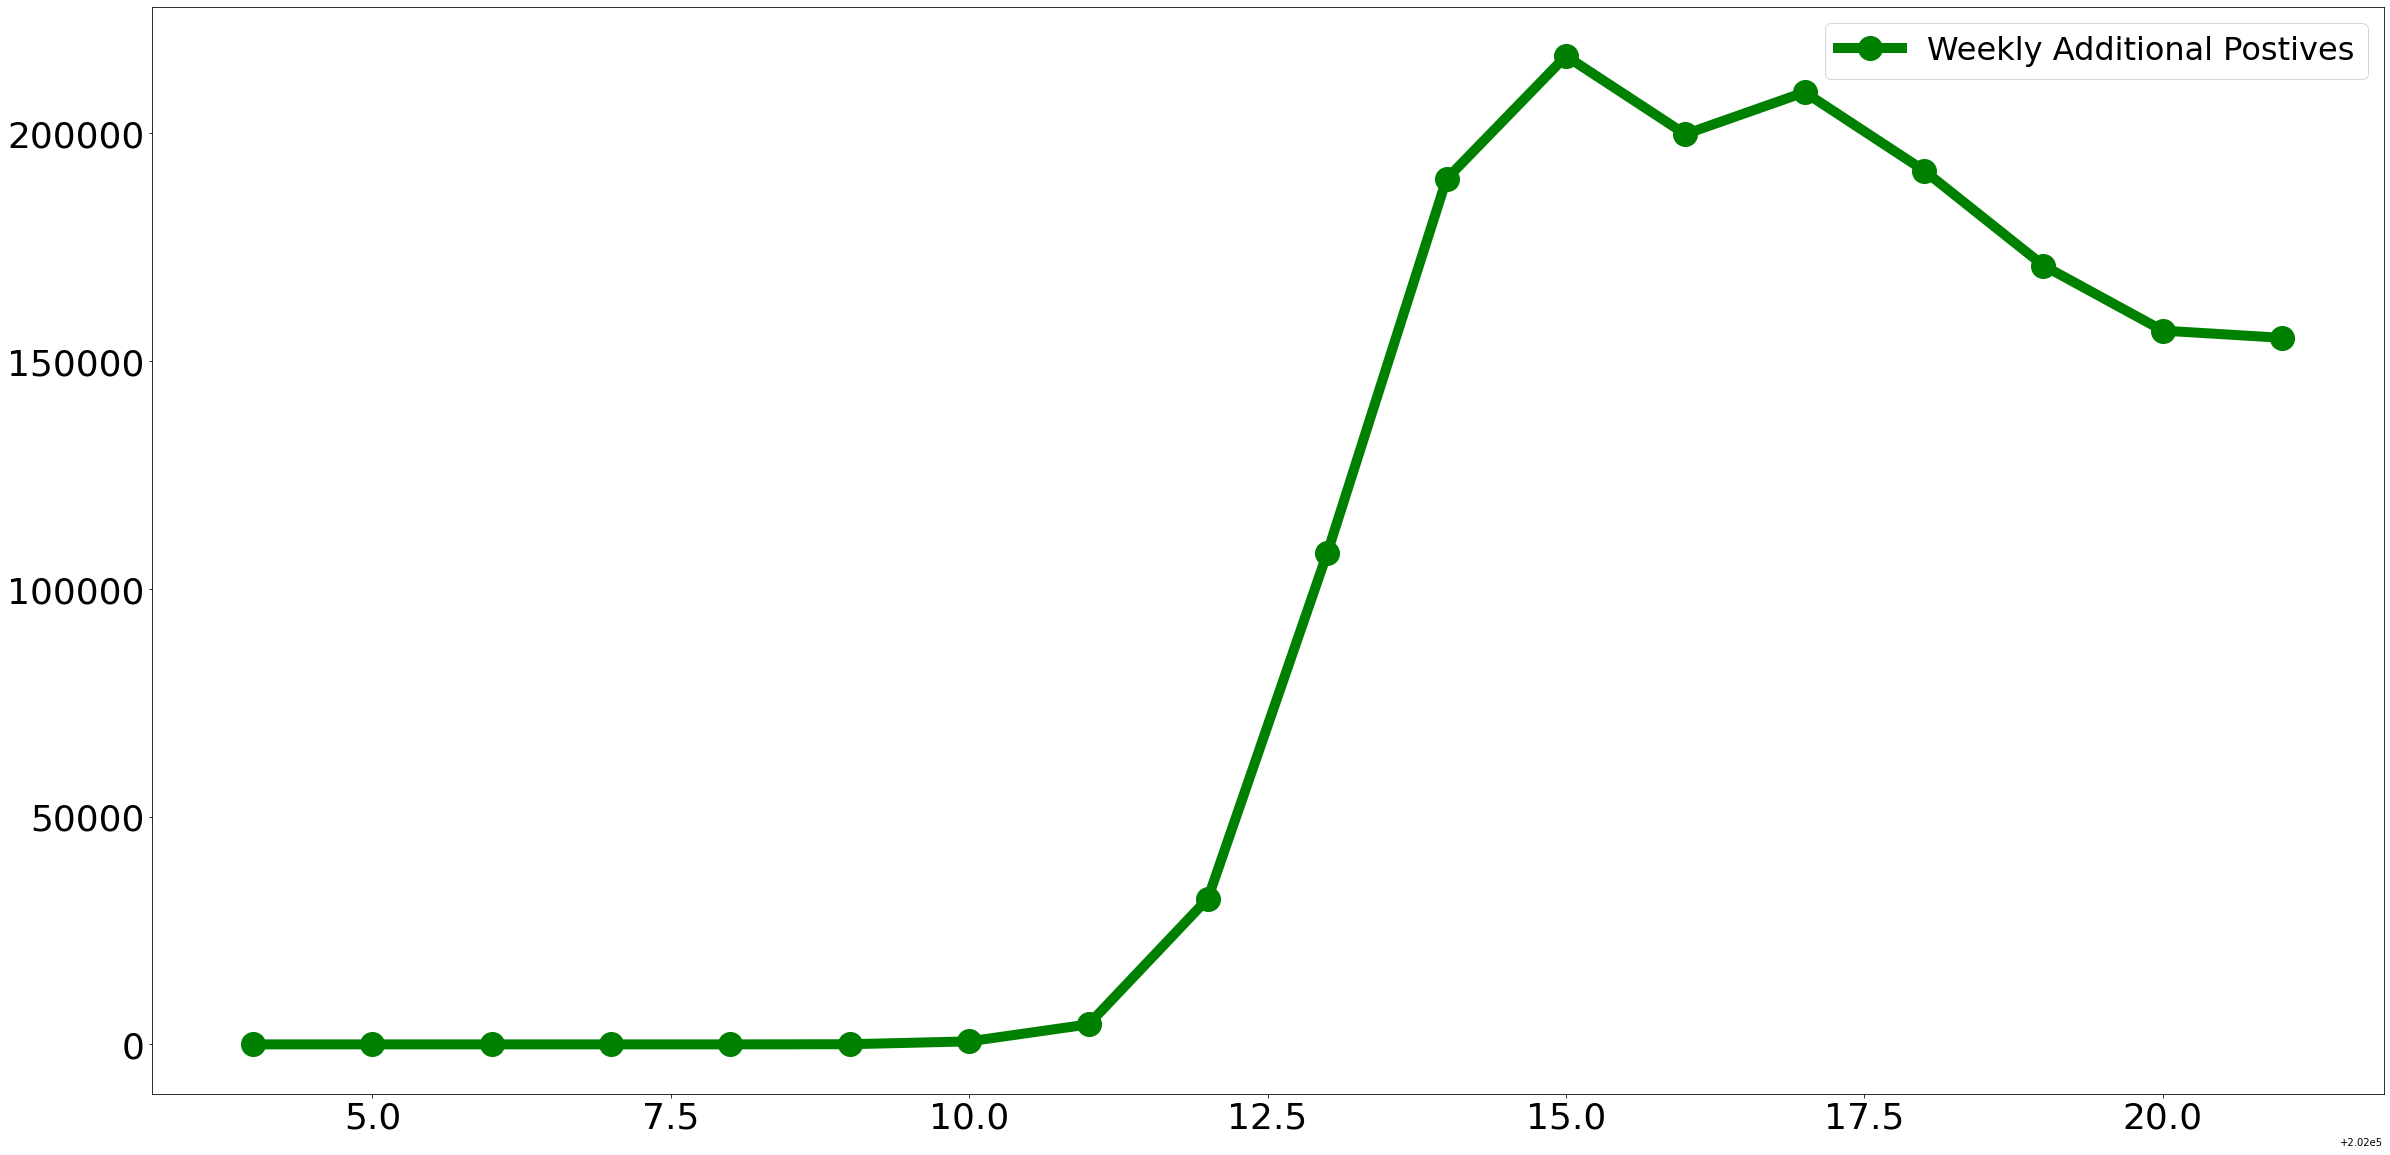

In [32]:
import matplotlib.ticker as ticker
plt1 = dfByWeekYear.sum()[:-1][['deathIncrease']].plot.line(figsize=(40,20), \
    fontsize=36, style='.-', markersize=48, linewidth=10, color='red')
plt1.legend(['Weekly Additional Deaths'],fontsize=32)
plt2 = dfByWeekYear.sum()[:-1][['totalTestResultsIncrease']].plot.line(figsize=(40,20), \
    fontsize=36, style='.-', markersize=48, linewidth=10, color='purple')
plt2.legend(['Weekly Additional Tests'],fontsize=32)

plt2.yaxis.set_major_formatter(ticker.FormatStrFormatter('%6.0d'))
    
plt3 = dfByWeekYear.sum()[:-1][['positiveIncrease']].plot.line(figsize=(40,20), \
    fontsize=36, style='.-', markersize=48, linewidth=10, color='green')
plt3.legend(['Weekly Additional Postives'],fontsize=32)

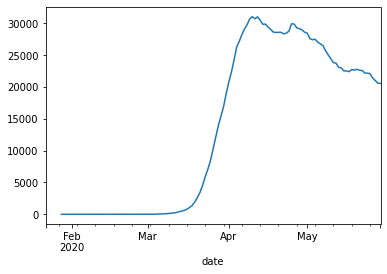

In [33]:
dfCovidtracking.groupby(by='date').sum().rolling(window=7).mean().positiveIncrease.plot.line()

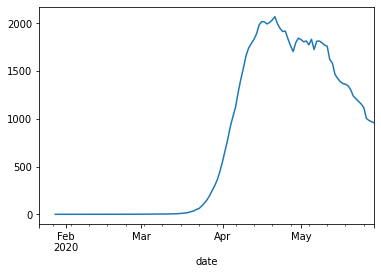

In [34]:
dfCovidtracking.groupby(by='date').sum().rolling(window=7).mean().deathIncrease.plot.line()

In [0]:
dfCAAvg = dfCovidtracking[dfCovidtracking.state=='CA'] \
.groupby(by='date').sum().rolling(window=7).mean()

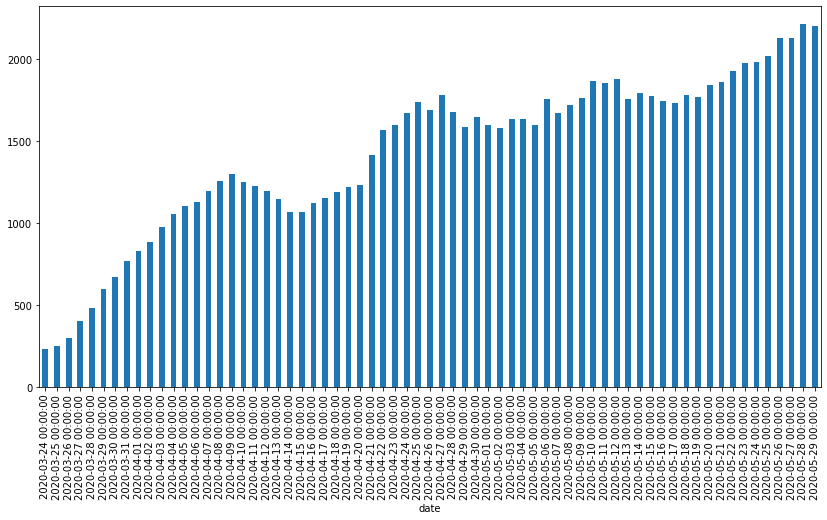

In [36]:

graph1 = dfCAAvg[20:].positiveIncrease.plot.bar(figsize=(14,7))


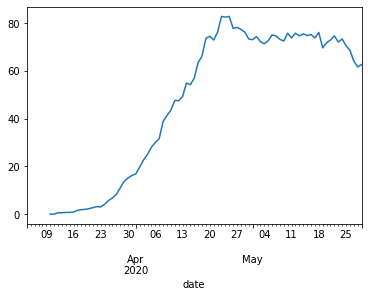

In [37]:
dfCAAvg.deathIncrease.plot.line()

In [38]:
dfDates = dfState.reset_index().copy()
dfDates[(dfDates.state.isin(['AL']))].head(10)

,state,date,positive,death,total_positive,pct
85,AL,2020-05-29,16823,605,16823,1.000000
86,AL,2020-05-28,16310,590,16823,0.969506
87,AL,2020-05-27,15843,581,16823,0.941746
88,AL,2020-05-26,15396,575,16823,0.915176
89,AL,2020-05-25,14730,562,16823,0.875587
90,AL,2020-05-24,14327,551,16823,0.851632
91,AL,2020-05-23,13938,546,16823,0.828509
92,AL,2020-05-22,13563,537,16823,0.806218
93,AL,2020-05-21,13119,529,16823,0.779825
94,AL,2020-05-20,12744,517,16823,0.757534


In [39]:
datecutoff = dfDates.date.max()-datetime.timedelta(days=14)
dfDates[(dfDates.date == datecutoff) & (dfDates.pct < .75)].sort_values(by='pct')


,state,date,positive,death,total_positive,pct
2125,MN,2020-05-15,14240,692,23531,0.605159
2537,NC,2020-05-15,17129,641,26488,0.646670
4535,WI,2020-05-15,11685,445,17707,0.659909
99,AL,2020-05-15,11216,476,16823,0.666706
4160,VA,2020-05-15,28672,977,42533,0.674112
183,AR,2020-05-15,4463,98,6538,0.682625
3567,PR,2020-05-15,2542,122,3647,0.697011
2624,ND,2020-05-15,1761,42,2520,0.698810
2708,NE,2020-05-15,9416,113,13261,0.710052
343,AZ,2020-05-15,13169,651,18465,0.713187


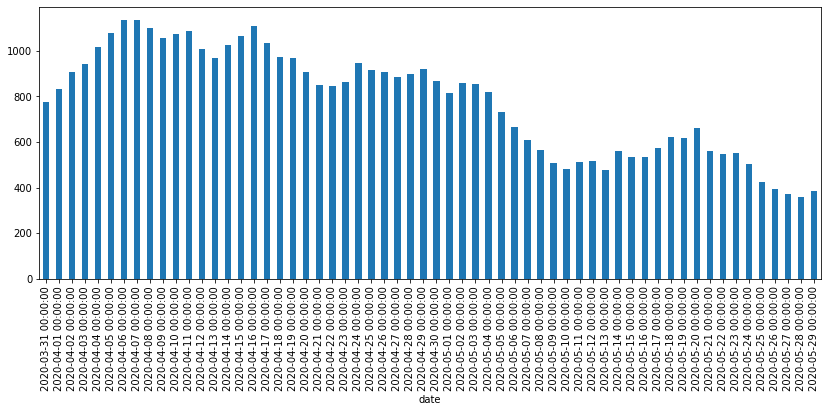

In [40]:

def showStateData(state):
  return dfCovidtracking[dfCovidtracking.state==state]\
  .sort_index()\
  .copy()



chart = showStateData('MI')\
.positiveIncrease\
.rolling(window=7)\
.mean()[-60:].plot.bar(figsize=(14,5))

In [41]:
dfTest = dfCovidtracking[dfCovidtracking.state=='CA'].sort_index().copy()
dfTest.head()

,state,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,onVentilatorCumulative,recovered,dataQualityGrade,lastUpdateEt,hash,dateChecked,death,hospitalized,total,totalTestResults,posNeg,fips,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease
date,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-03-04,CA,53,462,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,4a075d5c57bdb3c2b68cdc0024a0f5c14b77cb67,2020-03-04T21:00:00Z,0,0.0,515,515,515,06,0.0,0.0,0.0,0.0,0.0
2020-03-05,CA,53,462,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,29660d4104d8a82ef4d69e5359cc586629d587ef,2020-03-05T21:00:00Z,0,0.0,515,515,515,06,0.0,0.0,0.0,0.0,0.0
2020-03-06,CA,60,462,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0bb79dc4f15a1eb8575ec0ca84b4e6b1f801756f,2020-03-06T21:00:00Z,0,0.0,522,522,522,06,0.0,0.0,0.0,7.0,7.0
2020-03-07,CA,69,462,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,e233a4c19e477fd4f7bcf450c3a73790f87a5680,2020-03-07T21:00:00Z,0,0.0,531,531,531,06,0.0,0.0,0.0,9.0,9.0
2020-03-08,CA,88,462,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,a34b3bacf8a39873680d04e62a718fc240a6ab06,2020-03-08T20:00:00Z,0,0.0,550,550,550,06,0.0,0.0,0.0,19.0,19.0


In [42]:
dfTest.head()

,state,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,onVentilatorCumulative,recovered,dataQualityGrade,lastUpdateEt,hash,dateChecked,death,hospitalized,total,totalTestResults,posNeg,fips,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease
date,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-03-04,CA,53,462,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,4a075d5c57bdb3c2b68cdc0024a0f5c14b77cb67,2020-03-04T21:00:00Z,0,0.0,515,515,515,06,0.0,0.0,0.0,0.0,0.0
2020-03-05,CA,53,462,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,29660d4104d8a82ef4d69e5359cc586629d587ef,2020-03-05T21:00:00Z,0,0.0,515,515,515,06,0.0,0.0,0.0,0.0,0.0
2020-03-06,CA,60,462,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0bb79dc4f15a1eb8575ec0ca84b4e6b1f801756f,2020-03-06T21:00:00Z,0,0.0,522,522,522,06,0.0,0.0,0.0,7.0,7.0
2020-03-07,CA,69,462,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,e233a4c19e477fd4f7bcf450c3a73790f87a5680,2020-03-07T21:00:00Z,0,0.0,531,531,531,06,0.0,0.0,0.0,9.0,9.0
2020-03-08,CA,88,462,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,a34b3bacf8a39873680d04e62a718fc240a6ab06,2020-03-08T20:00:00Z,0,0.0,550,550,550,06,0.0,0.0,0.0,19.0,19.0


# State Population Data


In [0]:
data_url = "https://www2.census.gov/programs-surveys/popest/datasets/2010-2019/national/totals/nst-est2019-alldata.csv"


In [0]:
dfUSPop = pd.read_csv(data_url)

In [45]:
import math
us_pop = dfUSPop.loc[0].POPESTIMATE2019 #Estimate from Wikipedia
res = dfCovidtracking.loc[dfCovidtracking.index.max()][['positive', 'negative', 'pending','death', 'total']].sum()
cir = res.positive/res.total
cfr = res.death/res.positive
p_aff= math.ceil(us_pop*cir)
p_dead= math.ceil(p_aff*cfr)
print(res)
print(f"Current Infection Rate {cir*100:2f}%")
print(f"Percentage of US affected: {(res.positive+res.death)/us_pop*100:2f}%")
print(f"Observed CFR: {cfr*100:2f}%")
print(f"Percentage of US tested/affected: {(res.negative+res.positive+res.death)/us_pop*100:2f}%")
print(f"Projected affected by cir = {p_aff:,d}")
print(f"Projected killed = {p_dead:,d}")


positive     1736571
negative    14362944
pending         2978
death          96891
total       16102493
dtype: int64
Current Infection Rate 10.784485%
Percentage of US affected: 0.558574%
Observed CFR: 5.579444%
Percentage of US tested/affected: 4.934325%
Projected affected by cir = 35,398,944
Projected killed = 1,975,065


In [0]:
!if [ ! -d "loc" ]; then \
git clone https://gist.github.com/rogerallen/1583593 --depth=1 --quiet loc; \
fi
import sys
sys.path.append("loc")




In [0]:
import us_state_abbrev as us_abbr


In [0]:
dfStatePop = dfUSPop[dfUSPop.STATE != 0].copy()

In [0]:
dfStatePop['ABBR']=dfStatePop.NAME.apply(lambda x: us_abbr.us_state_abbrev[x])

In [0]:
dfStatePop = dfStatePop.loc[:, ['ABBR', 'POPESTIMATE2019']]
dfStatePop.set_index('ABBR', inplace=True)

In [0]:
dfStateCovid = dfCovidtracking.loc[dfCovidtracking.index.max()].set_index('state')

In [0]:
dfStateJoin = dfStateCovid.join(dfStatePop)

In [53]:
pd.DataFrame([(dfStateJoin.positive / dfStateJoin.POPESTIMATE2019)*100, \
              (dfStateJoin.totalTestResults/ dfStateJoin.POPESTIMATE2019)*100],\
             index=['state_pos_pop','state_test_pop'] ).T.sort_values(by="state_pos_pop", ascending=False)[:51]

,state_pos_pop,state_test_pop
state,,
NY,1.893144,9.993697
NJ,1.788343,8.065702
MA,1.385738,8.295172
RI,1.381493,13.815404
DC,1.209779,6.214391
CT,1.171350,6.770647
DE,0.948484,5.908310
IL,0.926899,6.721702
MD,0.843379,4.706137


In [54]:
#print(f"Current Infection Rate {res.positive/res.total*100:2f}%")

print(f"Current Testing Percent {gbUSA.sum().tail(1).totalTestResults[0]/dfUSPop[dfUSPop.REGION=='0'].POPESTIMATE2019[0]*100:2f}%")

Current Testing Percent 4.904807%


In [55]:
dfJHUData.columns

Index(['FIPS', 'city', 'state', 'country', 'last_update', 'lat', 'lon',
       'confirmed', 'dead', 'recovered', 'active', 'key'],
      dtype='object')

# OWID Data

In [0]:
dfOwid = pd.read_csv("https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv")

In [57]:
dfOwid.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20556 entries, 0 to 20555
Data columns (total 32 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   iso_code                         20492 non-null  object 
 1   location                         20556 non-null  object 
 2   date                             20556 non-null  object 
 3   total_cases                      20556 non-null  int64  
 4   new_cases                        20556 non-null  int64  
 5   total_deaths                     20556 non-null  int64  
 6   new_deaths                       20556 non-null  int64  
 7   total_cases_per_million          20171 non-null  float64
 8   new_cases_per_million            20171 non-null  float64
 9   total_deaths_per_million         20171 non-null  float64
 10  new_deaths_per_million           20171 non-null  float64
 11  total_tests                      5515 non-null   float64
 12  new_tests         

In [0]:
dfOwidTests = dfOwid.dropna(subset=['total_tests']).copy()

In [0]:
dfOwidLatest = dfOwidTests.sort_values(by='date').groupby('iso_code').last()

In [60]:
dfOwidLatest.total_tests.sort_values(ascending=False)

iso_code
USA    15192481.0
RUS     9701280.0
DEU     3952971.0
ITA     3683144.0
IND     3362136.0
          ...    
BOL       25065.0
MMR       22791.0
MDV       20842.0
CRI       17654.0
ZWE       16254.0
Name: total_tests, Length: 85, dtype: float64

In [61]:
isUSA = dfOwidLatest.index.isin(['USA'])
NonUSTests = dfOwidLatest[~isUSA].total_tests.sum()
USTests = dfOwidLatest[isUSA].total_tests.sum()

print(f"Total testing done outside of USA: {NonUSTests:.0f}")
print(f"Total tests done in USA : {USTests:.0f}")
print(f"How many more times has the world tested more than the US: {NonUSTests/USTests:.1f}")

Total testing done outside of USA: 49909995
Total tests done in USA : 15192481
How many more times has the world tested more than the US: 3.3


In [62]:
dfOwidLatest[isUSA].sum()

location                                                         United States
date                                                                2020-05-27
total_cases                                                            1681212
new_cases                                                                18910
total_deaths                                                             98916
new_deaths                                                                 696
total_cases_per_million                                                5079.15
new_cases_per_million                                                   57.129
total_deaths_per_million                                               298.837
new_deaths_per_million                                                   2.103
total_tests                                                        1.51925e+07
new_tests                                                               285440
total_tests_per_thousand                            

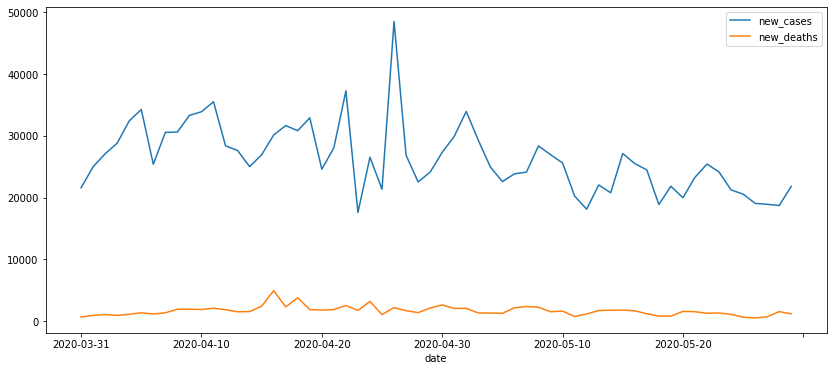

In [63]:
dfOwidUSA = dfOwid.loc[dfOwid.iso_code=='USA']

dfOwidUSA.set_index('date')[['new_cases','new_deaths']][-60:].plot.line(figsize=(14,6))

In [0]:
state = 'MN'
dfRollingWeekState = dfCovidtracking.loc[dfCovidtracking.state==state]\
.rolling(window=7).mean()


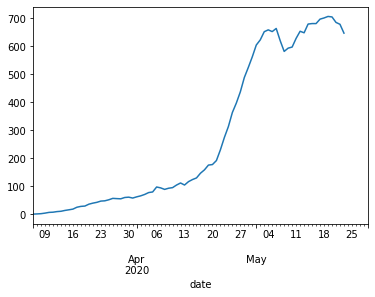

In [65]:
plt = dfRollingWeekState.positiveIncrease.plot.line()

In [66]:
dfJHUData[dfJHUData.state=='Florida'].confirmed.sum()

53285

In [0]:
doWGA = dfCovidtracking[dfCovidtracking.state=='GA'][['deathIncrease', 'hospitalizedIncrease', 'negativeIncrease','positiveIncrease','totalTestResultsIncrease']]\
.groupby(lambda x: x.dayofweek)

In [68]:
doWGA.sum()

,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease
0,286.0,895.0,71079.0,5183.0,76262.0
1,438.0,1516.0,63965.0,7529.0,71494.0
2,350.0,1766.0,-18947.0,7948.0,-10999.0
3,325.0,1130.0,51311.0,6465.0,57776.0
4,309.0,1224.0,81259.0,8198.0,89457.0
5,174.0,1026.0,77174.0,5350.0,82524.0
6,92.0,295.0,78760.0,4995.0,83755.0


# Socrata (San Francisco) Data

In [69]:
!pip install sodapy

In [0]:
from sodapy import Socrata

In [0]:
client = Socrata("data.sfgov.org", "LCSuN5PrqWkGtBe9dULkS75Rz")
results_df = pd.DataFrame.from_records(client.get("tvq9-ec9w"))

In [72]:
results_df.case_disposition.unique()

array(['Confirmed', 'Death'], dtype=object)

In [0]:
res = results_df.astype({'case_count':'int16'})

In [0]:
dfresConf = res[res.case_disposition=='Confirmed']
dfresDead = res[res.case_disposition=='Death']

In [0]:
dfTotals = dfresConf.groupby(by='date').sum().join(dfresDead.groupby(by='date').sum(), \
        rsuffix='dead').fillna(0) \
        .rename(columns={'case_count':'positive', 'case_countdead':'dead'})

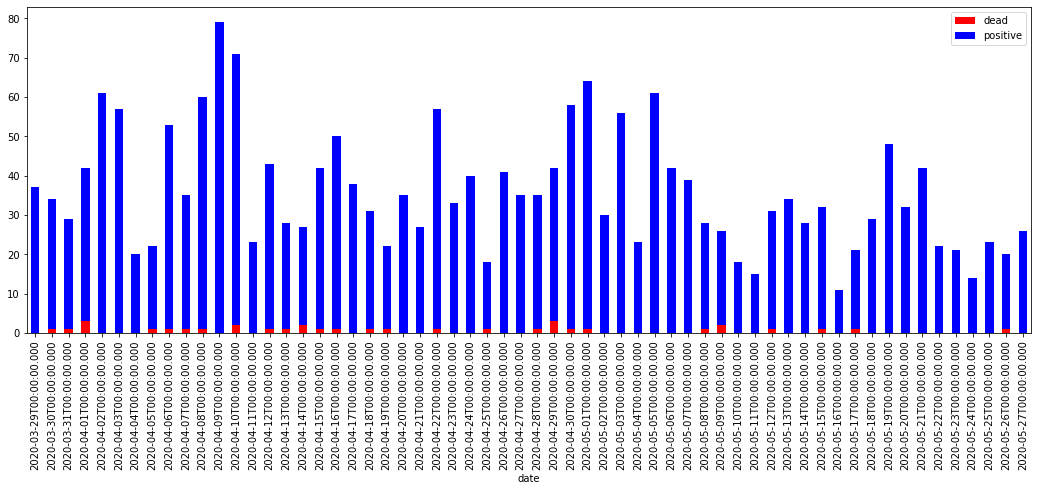

In [88]:
chart = dfTotals[['dead', 'positive']][-60:]\
.plot.bar(figsize=(18,6),stacked=True, color=['red','blue'])

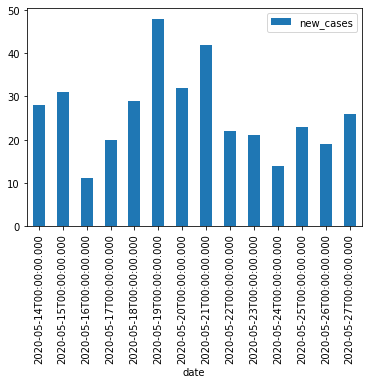

In [78]:
dfresConf.groupby('date').sum().rename(columns={'case_count':'new_cases'}).tail(14).plot.bar()

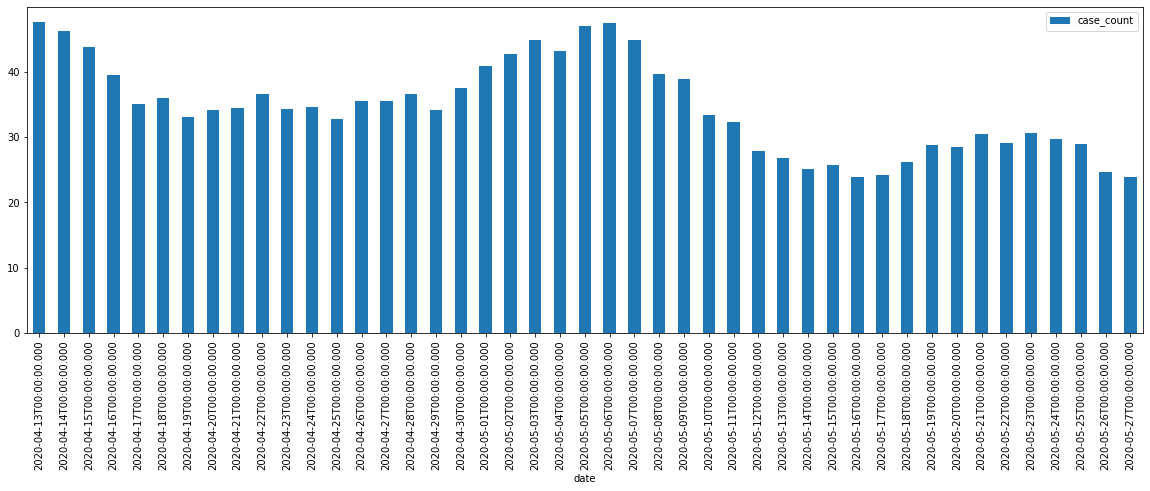

In [79]:
dfresConf.groupby('date').sum().rolling(window=7).mean()[-45:].plot.bar(figsize=(20,6))

# Marin Data

In [0]:
url = "https://docs.google.com/spreadsheets/d/e/2PACX-1vSRmO2pStf7Ft1yYjDULluZXzUAczGK_B34hDemDBadGEY0HTLwlcadF2cHNEwmmvLetUTf-D2ruYCT/pub?gid=0&single=true&output=csv"

df = pd.read_csv(url, header=1, parse_dates=[0], usecols=[0,1,3,5,6,7], index_col=[0])

In [81]:
df.tail()

,positive,deaths,tested,hospitalizations,Recovered
date,,,,,
2020-05-25,417,14.0,11587.0,51.0,262.0
2020-05-26,420,14.0,11796.0,52.0,269.0
2020-05-27,430,14.0,12064.0,52.0,274.0
2020-05-28,436,14.0,12428.0,52.0,289.0
2020-05-29,450,14.0,12712.0,52.0,305.0


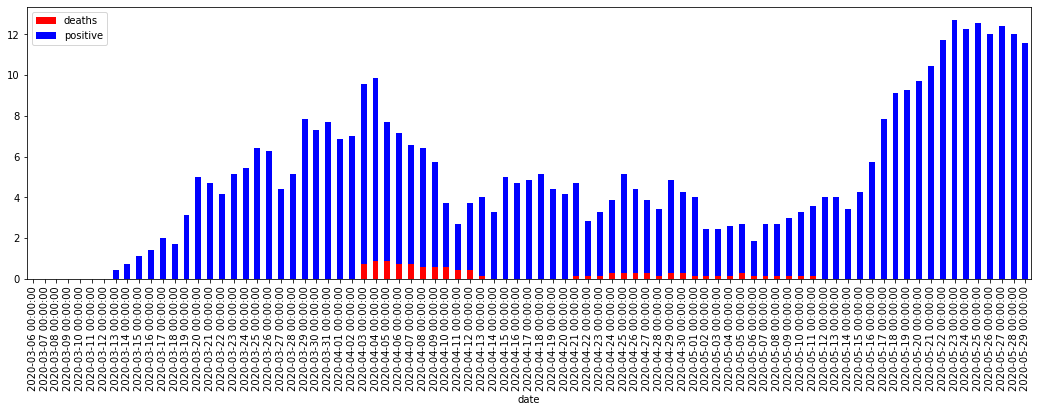

In [100]:
chart= df[['deaths','positive']].diff()\
.rolling(window=7).mean()[-90:]\
.plot.bar(stacked=True,figsize=(18,5), color=['r','b'])

In [83]:
marin_pop = 259725

print(f"Marin Population Positive: {(df[-1:].positive.values[0]/marin_pop)*100:2.2f}%")
print(f"Marin Population Tested: {(df[-1:].tested.values[0]/marin_pop)*100:2.2f}%")

Marin Population Positive: 0.17%
Marin Population Tested: 4.89%


In [84]:
df.positive.diff().rolling(window=7).mean().tail()

date
2020-05-25    12.571429
2020-05-26    12.000000
2020-05-27    12.428571
2020-05-28    12.000000
2020-05-29    11.571429
Name: positive, dtype: float64

In [85]:
dfCovidtracking[dfCovidtracking.state=='CA'].head(28)[::-1].positive.diff()


date
2020-05-02       NaN
2020-05-03    1419.0
2020-05-04    1321.0
2020-05-05    1275.0
2020-05-06    2603.0
2020-05-07    1799.0
2020-05-08    1898.0
2020-05-09    2049.0
2020-05-10    2119.0
2020-05-11    1259.0
2020-05-12    1443.0
2020-05-13    1759.0
2020-05-14    2023.0
2020-05-15    1772.0
2020-05-16    1857.0
2020-05-17    2046.0
2020-05-18    1591.0
2020-05-19    1365.0
2020-05-20    2262.0
2020-05-21    2140.0
2020-05-22    2247.0
2020-05-23    2187.0
2020-05-24    2079.0
2020-05-25    1848.0
2020-05-26    2175.0
2020-05-27    2247.0
2020-05-28    2717.0
2020-05-29    2189.0
Name: positive, dtype: float64